In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from time import time

In [2]:
n_walkers = 40
n_hopsperwalker = 30_000

n_samples = n_walkers * n_hopsperwalker
burn_in = int(3)
n_used = n_samples-burn_in*n_walkers

hop_size = 1.5                                    # set it in order to get alpha of about 0.5
#random.seed(10)

In [3]:
run -i Skeleton-Copy1.py 

In [4]:
list_alpha = [0.46, 0.9, 1.0, 1.1, 1.2]
#list_alpha = [1]
tic = time()
for i in list_alpha:
    pdfparameters = [i]
    functionparameters = [i]
    dist_x, dist_y, dist_z, accept_ratio, r_rp, rp_r = mcmc_sample_3D(hops=n_samples, pdf = psi_Hydrogen, pdfparam=pdfparameters)
    integral, variance= integrate_3D(func=E_L_Hydrogen, funcparam=functionparameters, dist_x_=dist_x, dist_y_=dist_y, dist_z_=dist_z)
    strin = "alpha: " + str(i) + "; integral: " + str((integral)) + " $\pm$ " + str(variance) + "; accepted/total = " + str(accept_ratio)
    print(strin)
toc = time()
print("Simulation time in seconds", toc-tic)

alpha: 0.46; integral: -0.353732263487293 $\pm$ 0.058216993356410625; accepted/total = 0.6902558333333333
alpha: 0.9; integral: -0.494816876761526 $\pm$ 0.0075623390707226035; accepted/total = 0.46248833333333333
alpha: 1.0; integral: -0.5 $\pm$ 0.0; accepted/total = 0.4219625
alpha: 1.1; integral: -0.49496766450945995 $\pm$ 0.011800710223297565; accepted/total = 0.3844241666666667
alpha: 1.2; integral: -0.48036796748768323 $\pm$ 0.04860075779236008; accepted/total = 0.34946166666666667
Simulation time in seconds 64.5047013759613


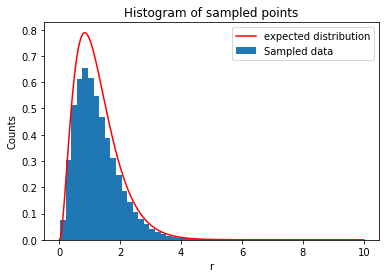

1.2478760793443253
6.521703418100389
max deviation from 0 in $A_{R' R}p(R') - A_{R' R}p(R')$ 5.551115123125783e-17


In [5]:
#plot_dist(dist_x, 40, psi_Hydrogen, pdfparameters[0])
#plot_dist(dist_y, 40, psi_Hydrogen, pdfparameters[0])
#plot_dist(dist_z, 40, psi_Hydrogen, pdfparameters[0])
dist_x = np.array(dist_x)
dist_y = np.array(dist_y)
dist_z = np.array(dist_z)
#print("L_x = ", len(dist_x))
#print("L_y = ", len(dist_y))
#print("L_z = ", len(dist_z))
dist_r = np.sqrt(dist_x**2 + dist_y**2 + dist_z**2)
plot_dist(dist_x, dist_y, dist_z,dist_r, 40, psi_Hydrogen, pdfparameters[0])
print(np.average(dist_r))
print(np.sqrt(np.pi/(2*0.45))**3)
print("max deviation from 0 in $A_{R' R}p(R') - A_{R' R}p(R')$",max(r_rp - rp_r))

#path of walkers.
#step = np.arange(1,len(dist_r)+1)
#plt.plot(step, dist_r)
#plt.ylabel("r")
#plt.xlabel("hop number")
#plt.title("path of walkers")
#plt.show()